In [1]:
import os
import json
import re
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt

In [3]:
def plot_cv(file, ngram, labelset, show=False):
    
    df = pd.read_json(file, lines=True)

    acc = pd.DataFrame(df['f1_valid'].values.tolist(), index=df.name)
    print(acc.mean(axis=1))
    
    f1_v = pd.DataFrame(df['f1_valid'].values.tolist(), index=df.name)
    fig, ax = plt.subplots(figsize=(10,5))
    f1_v.T.plot(ax=ax)
    ax.set_xlabel('K-fold')
    ax.set_ylabel('f1 score')
    fig.suptitle('f1 score of each classifier over CV fold on ' + ngram + ' gram model with labels from ' +
                 labelset, fontsize=15)
    plt.show()
#     plt.savefig(i.stem+'.png')
    
    if show:
        return df

In [4]:
# ROOT = 'C:\\Users\\niti.mishra\\Documents\\Personal\\cyberbullying\\'
ROOT = '/Users/peaceforlives/Documents/Projects/cyberbullying'

RESULTS = Path(os.path.join(ROOT, 'results'))
# RESULTS = Path(os.path.join(ROOT, 'results\\1g2g'))
PLOTS = Path(os.path.join(RESULTS))
files = [i for i in list(RESULTS.iterdir()) if '.json' in i.suffix ]
files

[]

TRACE_results7868
name
LogisticRegression (TruncatedSVD)    0.606602
LogisticRegression                   0.605841
SGDClassifier (TruncatedSVD)         0.589967
SGDClassifier                        0.607125
SVC                                  0.596206
MultinomialNB                        0.479123
GaussianNB (TruncatedSVD)            0.477997
dtype: float64


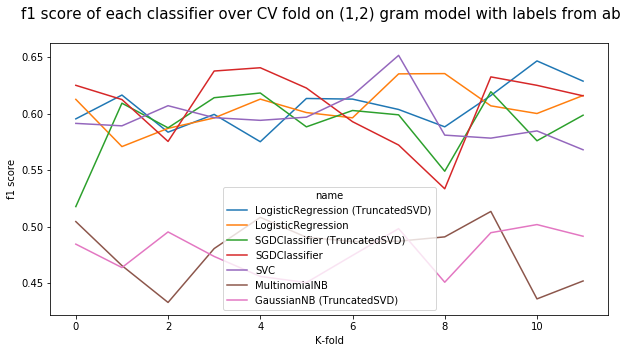

In [25]:
for i in files[2:]:
    print(i.stem)
    plot_cv(i, ngram='(1,2)', labelset='ab')
    

In [17]:
df = pd.read_json(files[2], lines=True)
df.head()

,model,name,size,accuracy,precision,recall,f1_valid,f1_train,time
0,"Pipeline(memory=None,\n steps=[('norma...",LogisticRegression (TruncatedSVD),"[[7212, 656], [7212, 656], [7212, 656], [7212,...","[0.632621951219512, 0.644817073170731, 0.61890...","[0.619056521596213, 0.616384870662526, 0.59614...","[0.632621951219512, 0.644817073170731, 0.61890...","[0.5953530529962741, 0.6164100430042501, 0.583...","[0.6472934838173461, 0.6489651578316691, 0.650...","[12.82875394821167, 12.372337102890015, 12.674..."
1,"Pipeline(memory=None,\n steps=[('norma...",LogisticRegression,"[[7212, 656], [7212, 656], [7212, 656], [7212,...","[0.641768292682926, 0.6036585365853651, 0.6234...","[0.625445298710371, 0.5896816512110431, 0.6207...","[0.641768292682926, 0.6036585365853651, 0.6234...","[0.612599628370564, 0.57084326390613, 0.586962...","[0.652537317479966, 0.6492632572253231, 0.6487...","[7.52205491065979, 7.632620096206665, 7.268364..."
2,"Pipeline(memory=None,\n steps=[('norma...",SGDClassifier (TruncatedSVD),"[[7212, 656], [7212, 656], [7212, 656], [7212,...","[0.6006097560975611, 0.652439024390243, 0.5853...","[0.571880621054499, 0.641579134769449, 0.59188...","[0.6006097560975611, 0.652439024390243, 0.5853...","[0.517783458923204, 0.609212953474072, 0.58741...","[0.59004579082801, 0.641124050572464, 0.684331...","[13.84741497039795, 12.301200866699219, 11.910..."
3,"Pipeline(memory=None,\n steps=[('norma...",SGDClassifier,"[[7212, 656], [7212, 656], [7212, 656], [7212,...","[0.6432926829268291, 0.6432926829268291, 0.612...","[0.630228280588591, 0.639583839775274, 0.58447...","[0.6432926829268291, 0.6432926829268291, 0.612...","[0.6250124440019911, 0.612446595641122, 0.5753...","[0.684198678615563, 0.6628350248615471, 0.6604...","[7.7530059814453125, 8.037430047988892, 8.0481..."


In [8]:
acc = pd.DataFrame(df['f1_valid'].values.tolist(), index=df.name)
print(acc.mean(axis=1))

name
LogisticRegression (TruncatedSVD)    0.656462
LogisticRegression                   0.661228
SGDClassifier (TruncatedSVD)         0.650767
SGDClassifier                        0.661682
SVC                                  0.663561
MultinomialNB                        0.492488
GaussianNB (TruncatedSVD)            0.594904
dtype: float64
